### Load the libraries

In [1]:
import os 
import numpy as np
import scipy as sci
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.collections as coll

import scanpy as sc
import anndata as ad

from scipy.sparse import csr_matrix
from matplotlib import rcParams
from matplotlib import colors

import custom_functions as cf

In [2]:
## set paramteres for visualisation

sc.settings.set_figure_params(dpi=80)

# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=500,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu",
                     #color_map="BuPu",
                     format='pdf', transparent=False,
                     ipython_format='png2x')

### Load the data

In [3]:
adata = ad.read("/home/hpc/martinez/00_projects/human/precision_toxicology/raw_scRNAseq_10X_precision_toxicology_combined_annotated_sep21.h5ad")

In [4]:
annot = []
for elem in adata.obs["shared_clusters"]:
    if elem == "losing_expression":
        annot.append("cluster4")
    else:
        annot.append(elem)
adata.obs["shared_clusters_across_donors"] = annot

In [5]:
adata.uns["shared_clusters_across_donors_colors"] = ['#d0d0d0', '#ff7f0e', '#1f77b4', '#17b2b1', '#9b1c03', '#0bee79', '#a47665']

... storing 'shared_clusters_across_donors' as categorical


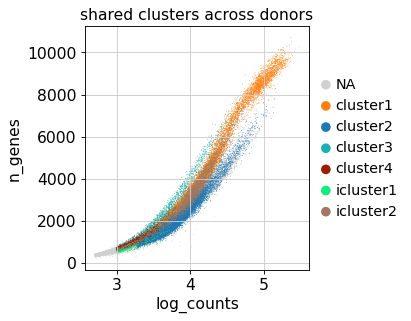

In [43]:
sc.pl.scatter(adata, "log_counts", "n_genes", color="shared_clusters_across_donors",
              save="_n_genes_vs_log_counts_combined_shared_clusters_20211112.pdf")

### Remove cells with no counts and genes covered in no cells

In [6]:
sc.pp.filter_genes(adata, min_cells=1)
sc.pp.filter_genes(adata, min_counts=1)

In [7]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_cells(adata, min_counts=1)

In [8]:
adata

AnnData object with n_obs × n_vars = 63527 × 17577
    obs: 'Age', 'Treatment', 'batch', 'sample_id', 'sample_name', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'replicate', 'subtype', 'subtype2', 'shared_clusters', 'donor_louvain', 'shared_clusters_sanity_check', 'shared_clusters_across_donors'
    var: 'gene_name', 'n_cells', 'n_counts'
    uns: 'shared_clusters_across_donors_colors'

In [9]:
annot = []
for idx, elem in enumerate(adata.obs["Age"]):
    annot.append("rep"+adata.obs["replicate"][idx]+"_"+elem)
adata.obs["donor"] = annot

In [10]:
adata.uns["donor_colors"] = ['#7c91b4', '#f81ef5', '#0f5e72', '#64215a']

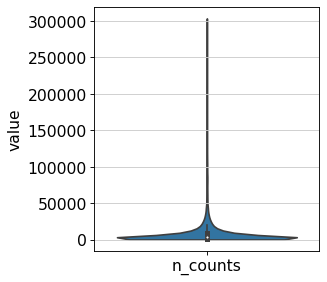

In [12]:
sc.pl.violin(adata, "n_counts", stripplot=False, inner="box", show=True, save="_count_all_20211210.pdf")

... storing 'donor' as categorical


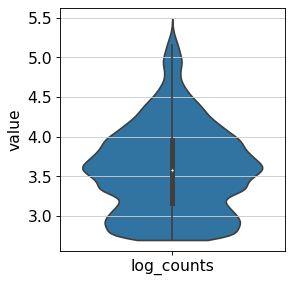

In [49]:
sc.pl.violin(adata, "log_counts", stripplot=False, inner="box", show=True, save="_log_count_all_20211112.pdf")

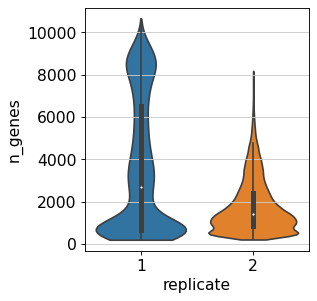

In [50]:
sc.pl.violin(adata, "n_genes", groupby="replicate", stripplot=False, inner="box", show=True,
             save="_n_genes_per_replicate_20211112.pdf")

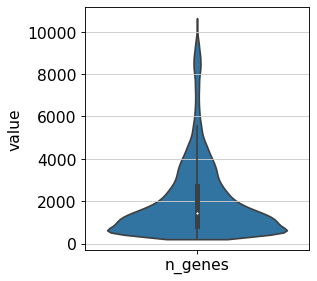

In [51]:
sc.pl.violin(adata, "n_genes", stripplot=False, inner="box", show=True,
             save="_n_genes_all_20211112.pdf")

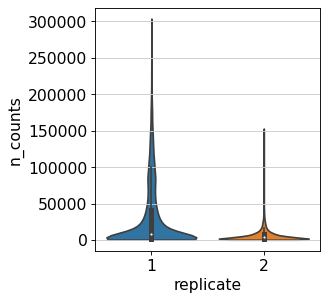

In [52]:
sc.pl.violin(adata, "n_counts", groupby="replicate", stripplot=False, inner="box",
            save="_n_counts_per_replicate_20211112.pdf")

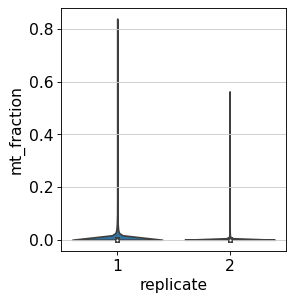

In [53]:
sc.pl.violin(adata, "mt_fraction", groupby="replicate", stripplot=False, inner="box",
            save="_mt_fraction_per_replicate_20211112.pdf")

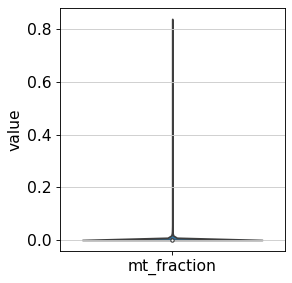

In [54]:
sc.pl.violin(adata, "mt_fraction", stripplot=False, inner="box", show=True,
             save="_mt_fraction_all_20211112.pdf")

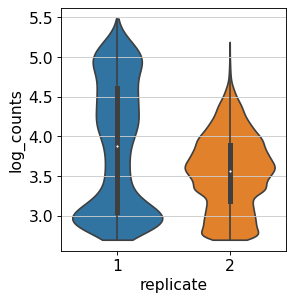

In [55]:
sc.pl.violin(adata, "log_counts", groupby="replicate", stripplot=False, inner="box",
            save="_log_counts_per_replicate_20211112.pdf")

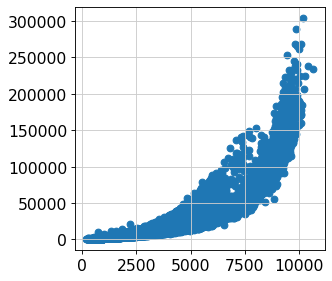

In [56]:
plt.scatter(x=adata.obs["n_genes"], y=adata.obs["n_counts"])

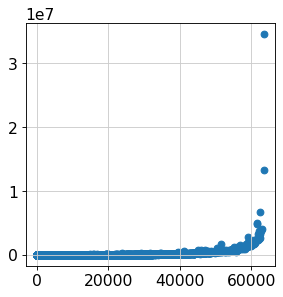

In [57]:
plt.scatter(x=adata.var["n_cells"], y=adata.var["n_counts"])

In [11]:
sc.pp.filter_cells(adata, min_counts=1000)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, max_counts=5e6)
sc.pp.filter_genes(adata, min_cells=5)

In [12]:
adata

AnnData object with n_obs × n_vars = 51942 × 16256
    obs: 'Age', 'Treatment', 'batch', 'sample_id', 'sample_name', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'replicate', 'subtype', 'subtype2', 'shared_clusters', 'donor_louvain', 'shared_clusters_sanity_check', 'shared_clusters_across_donors', 'donor'
    var: 'gene_name', 'n_cells', 'n_counts'
    uns: 'shared_clusters_across_donors_colors', 'donor_colors'

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 14.3%
Elapsed time: 5.3 seconds
Preprocessing...


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 2.5%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 8.2%
Elapsed time: 1.4 seconds
Preprocessing...


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 0.0%
Elapsed time: 0.9 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 5.4%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 7.5%
Elapsed time: 1.7 seconds
Preprocessing...


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 1.6%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 19.4%
Elapsed time: 0.9 seconds
Preprocessing...


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.9%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 0.0%
Elapsed time: 1.0 seconds
Preprocessing...


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.1%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 0.0%
Elapsed time: 1.3 seconds
Preprocessing...


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.07
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 31.6%
Elapsed time: 0.9 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 6.9%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 20.4%
Elapsed time: 4.5 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 15.2%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 11.4%
Elapsed time: 4.5 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 2.5%
Estimated detectable doublet fraction = 11.8%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 21.3%
Elapsed time: 10.5 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 12.5%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 16.1%
Elapsed time: 5.1 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 6.9%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 16.2%
Elapsed time: 4.2 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 3.6%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 21.0%
Elapsed time: 8.2 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 8.2%
Estimated detectable doublet fraction = 29.6%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 27.8%
Elapsed time: 2.9 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 6.2%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 24.8%
Elapsed time: 4.4 seconds


/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


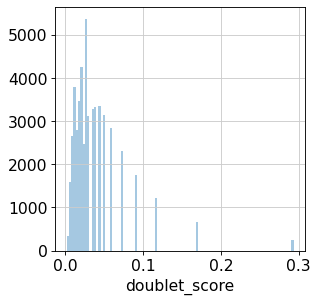

In [60]:
# ## Doublet detection
import scrublet as scr
import scipy.io
#import time

adata.obs['doublet_score']= np.zeros(adata.shape[0])
adata.obs['doublet'] = np.zeros(adata.shape[0])

# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 50

# doublet detector parameters:
expected_doublet_rate = 0.02 
sim_doublet_ratio = 3
n_neighbors = 15

for batch in enumerate(adata.obs['sample_id'].cat.categories):
    idx = np.flatnonzero(adata.obs['sample_id']==batch[1])
    scrub = scr.Scrublet(counts_matrix = adata[idx,:].X,  
                     n_neighbors = n_neighbors,
                     sim_doublet_ratio = sim_doublet_ratio,
                     expected_doublet_rate = expected_doublet_rate)
    doublet_scores, predicted_doublets = scrub.scrub_doublets( 
                    min_counts = min_counts, 
                    min_cells = min_cells, 
                    n_prin_comps = n_pc,
                    use_approx_neighbors = True, 
                    get_doublet_neighbor_parents = False)
    adata.obs['doublet_score'].iloc[idx] = doublet_scores
    adata.obs['doublet'].iloc[idx] = predicted_doublets


#rcParams['figure.figsize']=(6,6)
sns.distplot(adata.obs['doublet_score'], bins=100, kde=False).get_figure().savefig('figures/doublet_score.png')

In [1]:
51942 - 51037

905

In [2]:
905/51942

0.01742327981209811

In [61]:
# ### filter doublets
thr = 0.15
ix_filt = adata.obs['doublet_score']<=thr

adata = adata[ix_filt].copy()
print('Number of cells after doublet filter: {:d}'.format(adata.n_obs))

Number of cells after doublet filter: 51037


In [62]:
adata = adata[adata.obs['mt_fraction'] <= 0.01]

In [63]:
adata

View of AnnData object with n_obs × n_vars = 49378 × 16256
    obs: 'Age', 'Treatment', 'batch', 'sample_id', 'sample_name', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'replicate', 'subtype', 'subtype2', 'shared_clusters', 'donor_louvain', 'shared_clusters_sanity_check', 'shared_clusters_across_donors', 'donor', 'doublet_score', 'doublet'
    var: 'gene_name', 'n_cells', 'n_counts'
    uns: 'shared_clusters_across_donors_colors', 'donor_colors', 'replicate_colors'

In [64]:
adata.write("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_scRNAseq_10X_precision_toxicology_combined_annotated_test_env_nov21.h5ad")

/home/mrichter/miniconda3/envs/test_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'doublet' as categorical


In [37]:
#Perform a clustering to check if we should feed clusters into scran
adata_pp = adata.copy()
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=5000)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15)
sc.pp.neighbors(adata_pp)
sc.tl.louvain(adata_pp, key_added='groups', resolution=0.5)

In [38]:
sc.tl.umap(adata_pp)

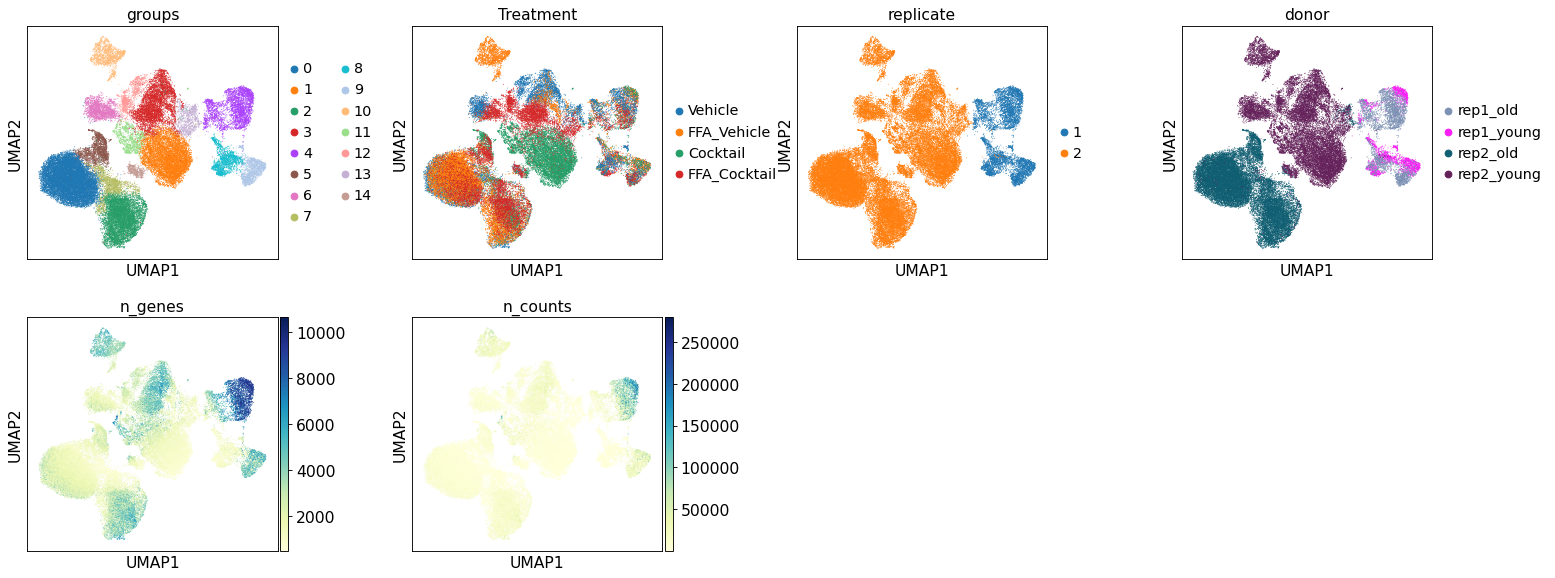

In [39]:
sc.pl.umap(adata_pp, color=["groups","Treatment","replicate","donor","n_genes","n_counts"],
           wspace=0.4)

### Save the filtered AnnData object

In [40]:
adata.write("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_scRNAseq_10X_precision_toxicology_combined_annotated_nov21.h5ad")

### Load R libraries needed to use scran for normalization

In [65]:
import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri
%load_ext rpy2.ipython
anndata2ri.activate()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [66]:
%%R
.libPaths("/home/mrichter/miniconda3/envs/test_env/lib/R/library")

In [67]:
%%R
library(scran)
library("org.Hs.eg.db")

In [68]:
import anndata as ad
import scanpy as sc
import numpy as np

In [69]:
adata = ad.read("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_scRNAseq_10X_precision_toxicology_combined_annotated_test_env_nov21.h5ad")

In [70]:
data_mat = adata.X.T
data_mat = data_mat.todense()

In [71]:
%%R -i data_mat -o size_factors

size_factors = computeSumFactors(data_mat, min.mean=0.05)

In [72]:
adata.layers["counts"] = adata.X.copy()

In [73]:
adata.obs["size_factors"] = size_factors

In [74]:
#Normalize adata 
adata.X /= adata.obs['size_factors'].values[:,None]
adata.layers["norm_counts"] = adata.X.copy()
adata.obs["n_counts_norm"] = np.sum(adata.X, axis=1)
sc.pp.log1p(adata)

In [75]:
adata.raw = adata

In [76]:
## cell cycle analysis
data_mat = adata.X.T
gnames = adata.var_names.tolist()
cnames = adata.obs_names.tolist()

In [77]:
%%R -i data_mat -i gnames -i cnames -o phases -o scores -o ensembl 
# cell cycle analysis using cyclone
# should be easy because it's implemented in scran
hg.pairs <- readRDS(system.file("exdata", "human_cycle_markers.rds", package="scran"))

rownames(data_mat) <- gnames
colnames(data_mat) <- cnames

ensembl <- mapIds(org.Hs.eg.db, keys=rownames(data_mat), keytype="SYMBOL", column="ENSEMBL")

score_list <- cyclone(data_mat, hg.pairs, gene.names=ensembl, iter=1000, min.iter=100, min.pairs=50) 
                      #BPPARAM=bpparam(), verbose=FALSE)

phases <- score_list$phases
scores <- score_list$scores

R[write to console]: 'select()' returned 1:many mapping between keys and columns



In [78]:
adata.var["gene_id"] = ensembl
adata.obs["cyclone_phases"] = phases
adata.obs["score_G1"] = scores["G1"].tolist()
adata.obs["score_S"] = scores["S"].tolist()
adata.obs["score_G2M"] = scores["G2M"].tolist()

In [79]:
adata.uns["cyclone_phases_colors"] = ['#505050', '#bc086b', '#9ad3e3']

### Save the normalized AnnData object that includes cell cycle annotation

In [80]:
adata.write("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_normalized_cyclone_scRNAseq_10X_precision_toxicology_combined_annotated_nov21.h5ad")

... storing 'cyclone_phases' as categorical
... storing 'gene_id' as categorical


### Further filtering

In [13]:
adata = ad.read("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_normalized_cyclone_scRNAseq_10X_precision_toxicology_combined_annotated_nov21.h5ad")

In [14]:
adata.uns["donor_colors"] = ['#f12786', '#64215a', '#b8bbb2', '#538392']
adata.uns["cyclone_phases_colors"] = ['#606060', '#cb1361', '#fbdc12']

In [15]:
adata

AnnData object with n_obs × n_vars = 49378 × 16256
    obs: 'Age', 'Treatment', 'batch', 'sample_id', 'sample_name', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'replicate', 'subtype', 'subtype2', 'shared_clusters', 'donor_louvain', 'shared_clusters_sanity_check', 'shared_clusters_across_donors', 'donor', 'doublet_score', 'doublet', 'size_factors', 'n_counts_norm', 'cyclone_phases', 'score_G1', 'score_S', 'score_G2M'
    var: 'gene_name', 'n_cells', 'n_counts', 'gene_id'
    uns: 'cyclone_phases_colors', 'donor_colors', 'replicate_colors', 'shared_clusters_across_donors_colors'
    layers: 'counts', 'norm_counts'

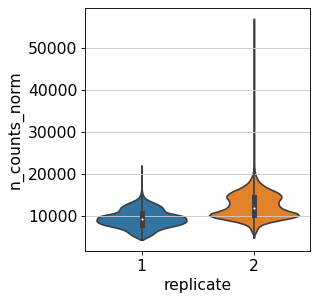

In [17]:
sc.pl.violin(adata, "n_counts_norm", groupby="replicate", stripplot=False, inner="box", show=True,
             save="_n_counts_norm_per_replicate_20211210.pdf")

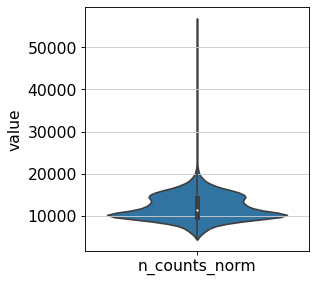

In [16]:
sc.pl.violin(adata, "n_counts_norm", stripplot=False, inner="box", show=True,
             save="_n_counts_norm_all_20211210.pdf")

In [91]:
adata = adata[adata.obs["n_counts_norm"] < 20000]

In [92]:
adata

View of AnnData object with n_obs × n_vars = 49121 × 16256
    obs: 'Age', 'Treatment', 'batch', 'sample_id', 'sample_name', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'replicate', 'subtype', 'subtype2', 'shared_clusters', 'donor_louvain', 'shared_clusters_sanity_check', 'shared_clusters_across_donors', 'donor', 'doublet_score', 'doublet', 'size_factors', 'n_counts_norm', 'cyclone_phases', 'score_G1', 'score_S', 'score_G2M'
    var: 'gene_name', 'n_cells', 'n_counts', 'gene_id'
    uns: 'cyclone_phases_colors', 'donor_colors', 'replicate_colors', 'shared_clusters_across_donors_colors'
    layers: 'counts', 'norm_counts'

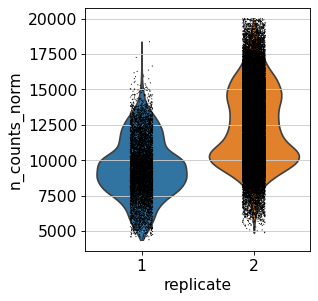

In [93]:
sc.pl.violin(adata, "n_counts_norm", groupby="replicate",
            save="_n_counts_norm_filtered_per_replicate_20211124.pdf")

### Remove the clusters containing cells in samples subject to wetting failure

In [94]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)

In [95]:
sc.tl.louvain(adata, resolution=0.4)

In [96]:
adata.uns["Treatment_colors"] = ['#888de4', '#deb82c', '#279e68', '#d62728']

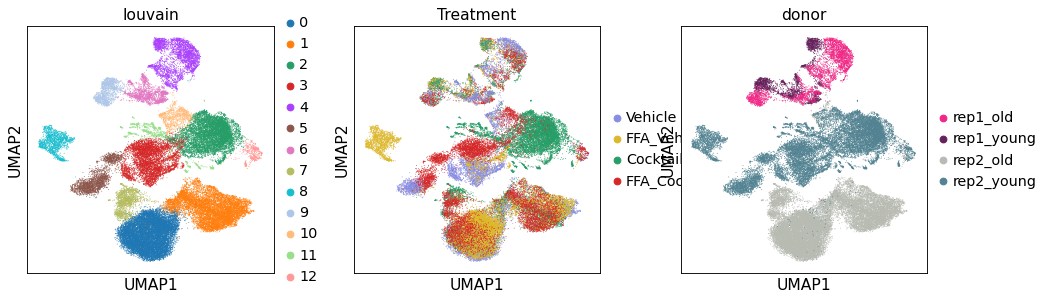

In [97]:
sc.pl.umap(adata, color=["louvain","Treatment","donor"])#, save="_combined_unintegrated_louvain_to_remove_clusters.pdf")

In [98]:
adata1 = adata[adata.obs["louvain"] != "2",:]
adata1 = adata1[adata1.obs["louvain"] != "8",:]
adata1 = adata1[adata1.obs["louvain"] != "11",:]
adata1 = adata1[adata1.obs["louvain"] != "12",:]

In [99]:
adata1

View of AnnData object with n_obs × n_vars = 38232 × 16256
    obs: 'Age', 'Treatment', 'batch', 'sample_id', 'sample_name', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'replicate', 'subtype', 'subtype2', 'shared_clusters', 'donor_louvain', 'shared_clusters_sanity_check', 'shared_clusters_across_donors', 'donor', 'doublet_score', 'doublet', 'size_factors', 'n_counts_norm', 'cyclone_phases', 'score_G1', 'score_S', 'score_G2M', 'louvain'
    var: 'gene_name', 'n_cells', 'n_counts', 'gene_id'
    uns: 'cyclone_phases_colors', 'donor_colors', 'replicate_colors', 'shared_clusters_across_donors_colors', 'pca', 'neighbors', 'umap', 'louvain', 'Treatment_colors', 'louvain_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'norm_counts'
    obsp: 'distances', 'connectivities'

In [100]:
adata1.write("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_normalized_scRNAseq_10X_precision_toxicology_combined_annotated_removed_bad_clusters_nov21.h5ad")

### Batch integration using Harmony

In [101]:
adata = ad.read("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_normalized_scRNAseq_10X_precision_toxicology_combined_annotated_removed_bad_clusters_nov21.h5ad")

In [102]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)

In [104]:
#adata.uns["shared_clusters_colors"] = ['#acbfb5', '#ff7f0e', '#1f77b4', '#17b2b1','#0bee79','#a47665', '#9b1c03']

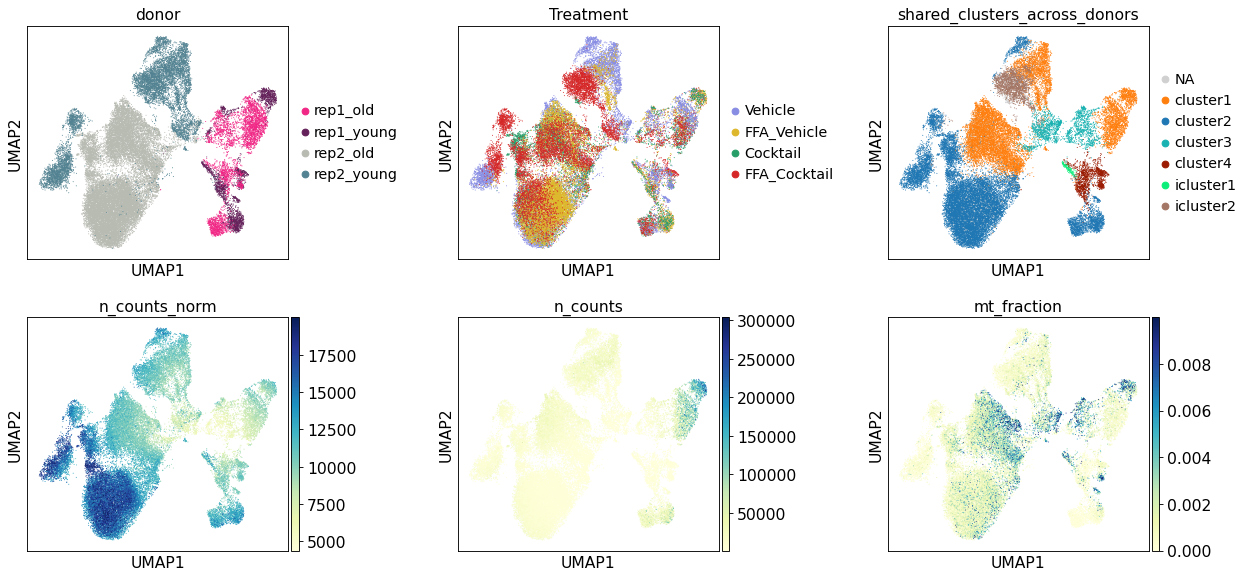

In [103]:
sc.pl.umap(adata, color=['donor',"Treatment","shared_clusters_across_donors",
                         "n_counts_norm","n_counts","mt_fraction"],
           ncols=3, wspace=0.5, cmap="YlGnBu",
          save="_metadata_unintegrated_20211125.pdf")

In [105]:
import scanpy.external as sce

In [106]:
sce.pp.harmony_integrate(adata, "replicate")

2021-11-26 10:13:51,075 - harmonypy - INFO - Iteration 1 of 10
2021-11-26 10:14:04,168 - harmonypy - INFO - Iteration 2 of 10
2021-11-26 10:14:17,298 - harmonypy - INFO - Iteration 3 of 10
2021-11-26 10:14:30,369 - harmonypy - INFO - Iteration 4 of 10
2021-11-26 10:14:43,414 - harmonypy - INFO - Iteration 5 of 10
2021-11-26 10:14:56,562 - harmonypy - INFO - Iteration 6 of 10
2021-11-26 10:15:09,571 - harmonypy - INFO - Iteration 7 of 10
2021-11-26 10:15:18,981 - harmonypy - INFO - Iteration 8 of 10
2021-11-26 10:15:25,435 - harmonypy - INFO - Iteration 9 of 10
2021-11-26 10:15:31,303 - harmonypy - INFO - Iteration 10 of 10
2021-11-26 10:15:37,209 - harmonypy - INFO - Stopped before convergence


In [107]:
sc.pp.neighbors(adata, use_rep="X_pca_harmony")

In [108]:
sc.tl.umap(adata)

In [4]:
sc.tl.louvain(adata)

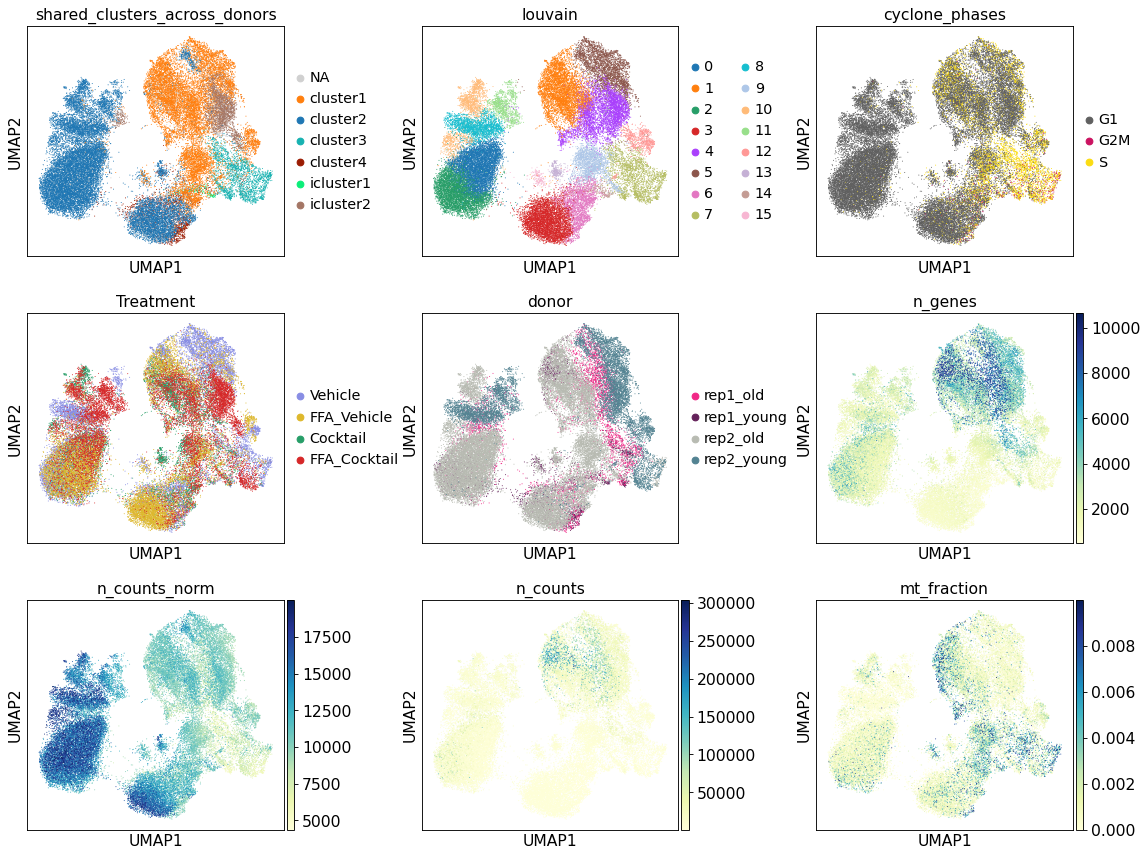

In [6]:
sc.pl.umap(adata, color=["shared_clusters_across_donors","louvain","cyclone_phases",
                         "Treatment","donor","n_genes",
                         "n_counts_norm", "n_counts", "mt_fraction"],
           ncols=3, wspace=0.4,
          save="_metadata_integrated_20211125.pdf")

In [111]:
adata.write("/home/hpc/martinez/00_projects/human/precision_toxicology/filtered_joint_scran_normalized_removed_clusters_scRNAseq_10X_precision_toxicology_Harmony_nov21.h5ad")